# 1. Setup

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from neural_network import NeuralNetwork
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target


# 2. Training Data

Here, to test our neural network package, we'll use the california housing data, and scale it as nessecary

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape targets to match shape (n_samples, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# 3. Testing Different Activation Algorithms
We'll test different actiavtion algorithms to see what works best for the data. For the sake of time, we'll do our initial test with only one layer, and we'll try out a multidimensional neural network with whatever activation function has the best initial $R^2$ value.

## 3.1 ReLU

In [9]:
# Train neural network
nn = NeuralNetwork(
    n_input=X_train.shape[1],
    hidden_dims=[1],
    n_output=1,
    learning_rate=0.01,
    n_iters=1000,
    activation_function='relu'
)
nn.fit(X_train_scaled, y_train)

# Predict
y_pred = nn.predict(X_test_scaled).flatten()
y_true = y_test.flatten()

# Manually compute R² score
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("R² score on test set:", r_squared)

R² score on test set: 0.5124631957785063


## 3.2 Sigmoid

In [10]:
# Train neural network
nn = NeuralNetwork(
    n_input=X_train.shape[1],
    hidden_dims=[1],
    n_output=1,
    learning_rate=0.01,
    n_iters=1000,
    activation_function='sigmoid'
)
nn.fit(X_train_scaled, y_train)

# Predict
y_pred = nn.predict(X_test_scaled).flatten()
y_true = y_test.flatten()

# Manually compute R² score
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("R² score on test set:", r_squared)

R² score on test set: 0.31238826421006904


## 3.3 TanH

In [11]:
# Train neural network
nn = NeuralNetwork(
    n_input=X_train.shape[1],
    hidden_dims=[1],
    n_output=1,
    learning_rate=0.01,
    n_iters=1000,
    activation_function='tanh'
)
nn.fit(X_train_scaled, y_train)

# Predict
y_pred = nn.predict(X_test_scaled).flatten()
y_true = y_test.flatten()

# Manually compute R² score
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("R² score on test set:", r_squared)

R² score on test set: 0.5288270548865965


As we can see, the tanh activation function produced the best result.
# 4. MultiLayer Neural Network
For the sake of time, we'll only try up to 2 layers and 10 neurons, especially since our dataset isn't that complicated. However, much more complicated neural networks are possible.

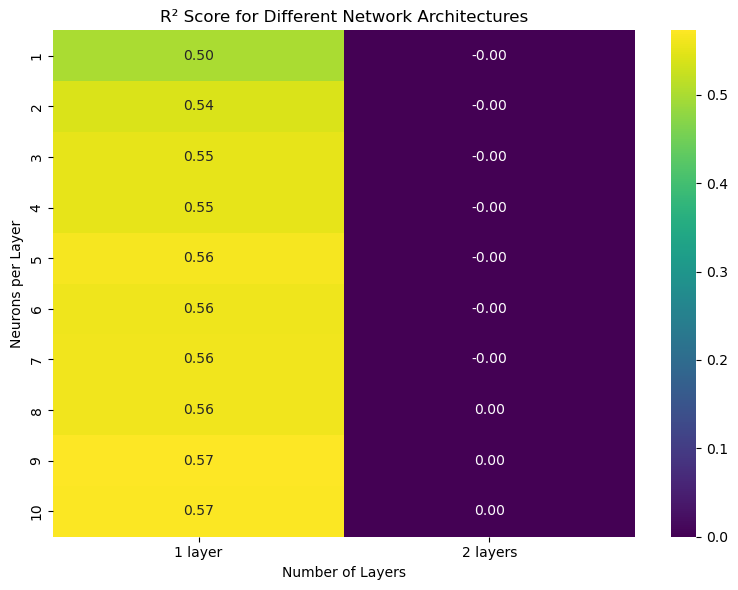

In [14]:
max_neurons = 10
r2_scores = np.zeros((max_neurons, 2))  # rows: neurons 1 to 10, cols: 1 layer, 2 layers

for neurons in range(1, max_neurons + 1):
    for layers in [1, 2]:
        hidden_dims = [neurons] * layers
        nn = NeuralNetwork(
            n_input=X_train_scaled.shape[1],
            hidden_dims=hidden_dims,
            n_output=1,
            learning_rate=0.01,
            n_iters=1000,
            activation_function='tanh'
        )
        nn.fit(X_train_scaled, y_train)
        y_pred = nn.predict(X_test_scaled).flatten()
        y_true = y_test.flatten()
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        r2_scores[neurons - 1, layers - 1] = r_squared

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(r2_scores, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=['1 layer', '2 layers'],
            yticklabels=[str(i) for i in range(1, max_neurons + 1)])
plt.xlabel("Number of Layers")
plt.ylabel("Neurons per Layer")
plt.title("R² Score for Different Network Architectures")
plt.tight_layout()
plt.show()

It appears for this specific dataset, that adding more neurons to one layer improves the performance of the algorithm, but adding more layers does not. Results may vary depending on the specific problems associated with each dataset.